In [9]:
import sys
import os
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import statistics as stats

directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/256x384x128"
filename_prefix = directory+'/shearlayer_'

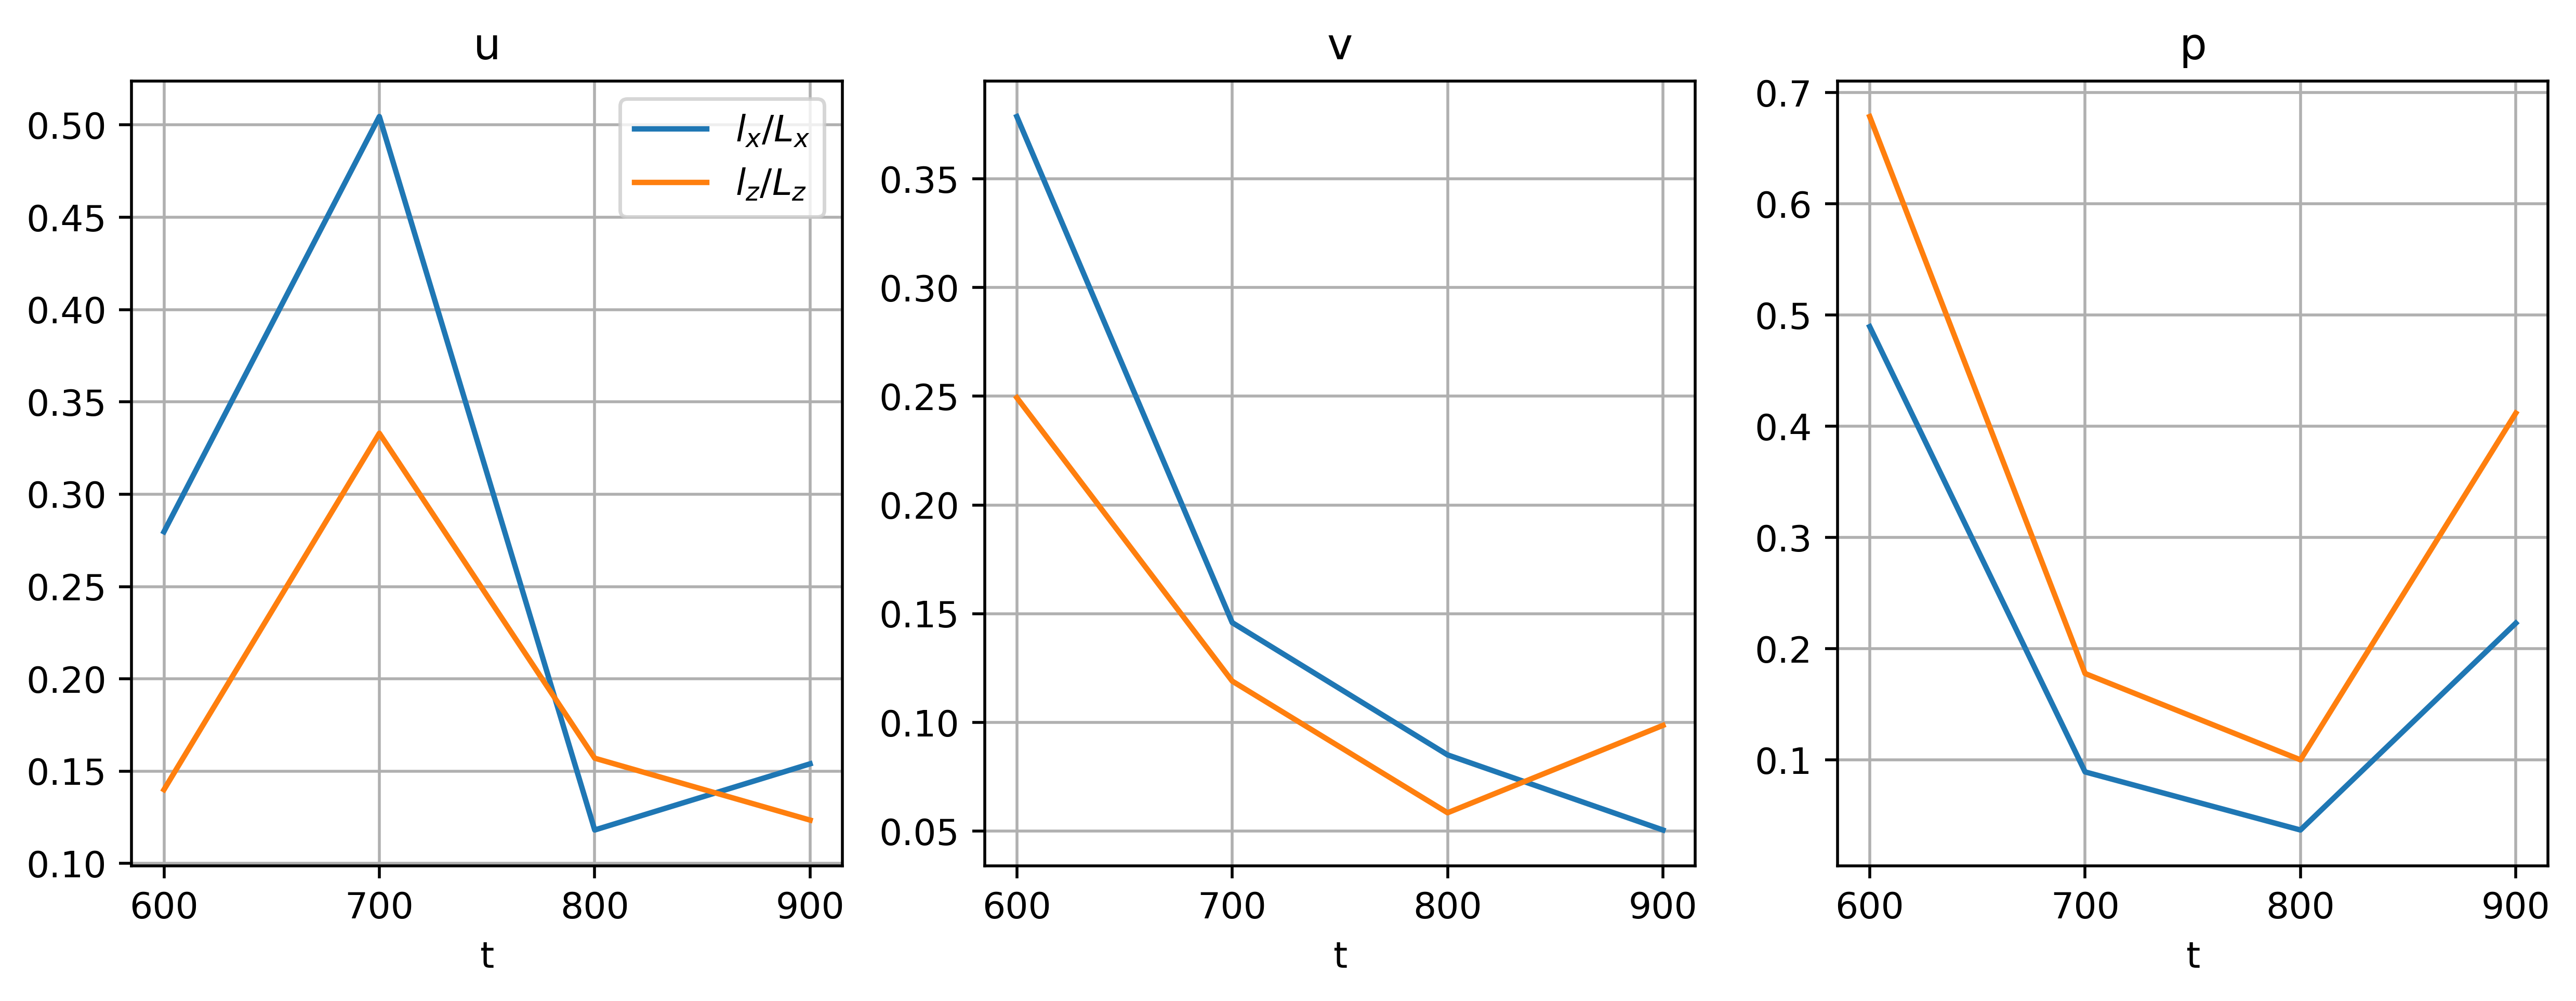

In [10]:
# Integral lengthscales

fname = filename_prefix+'integral_lengthscale.dat'
dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
n = np.size(dat)

Nq = 3
qlist = ['u','v','p']
nstats=1+2*Nq+1
dat = np.reshape(dat,[n/nstats,nstats])
time = dat[:,0]
lx = dat[:,1:Nq+1]
lz = dat[:,Nq+2:]

# Plotting
fig, axarr = plt.subplots(1,3, figsize=(12,4), dpi=500) 
for i in range(3):
    axarr[i].plot(time,lx[:,i],label='$l_x/L_x$');
    axarr[i].plot(time,lz[:,i],label='$l_z/L_z$');
    axarr[i].grid(True)
    axarr[i].set_xlabel('t')
    axarr[i].set_title(qlist[i])
axarr[0].legend()


